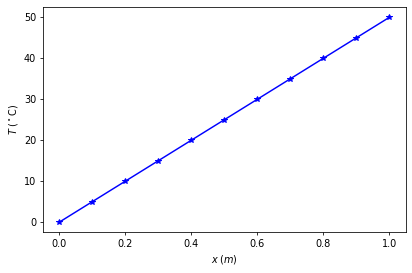

In [62]:
import numpy as np
import matplotlib.pyplot as plt

T_air, T_low, T_high = 30.0, 0.0, 50.0  # degrees
alpha = 1.
Lx = 1. # meters
x_arr = np.linspace(0,Lx,11)
T_arr = 50. * x_arr 

fig = plt.figure( dpi = 70 ) # dots per inch
fig.set_size_inches(6,4)
plt.plot(x_arr, T_arr,'-b*',label = 'analytic solution')
plt.xlabel(r'$x\;(m)$')
plt.ylabel(r'$T\; ({\rm ^\circ C})$')

plt.tight_layout()
plt.savefig("Unit_4.14a_1d_beta_0.png")


In [4]:
import numpy as np

def MySOR(A,b,omega,u_vec):
    residual_convergence = 1e-10
    residual = np.linalg.norm(np.dot(A, u_vec) - b) #Initial residual
    iter_count = 0
    n = len(b)
    while residual > residual_convergence:
        iter_count+=1
        for i in range(n):
            sigma_i = 0
            for j in range(n):
                if j < i: # lower triangle elements
                    sigma_i += A[i][j] * u_vec[j]
                if j > i: # upper traignel elements
                    sigma_i += A[i][j] * u_vec[j]
            u_vec[i] = (1. - omega) * u_vec[i]  + omega * 1./A[i][i] * ( b[i] - sigma_i)
        #swap 
        residual = np.linalg.norm(np.dot(A, u_vec) - b)
    return [u_vec,residual,iter_count]




A = np.array([[ 1., 0.,  0.,  0., 0., 0, 0, 0, 0, ],
              [1.,  -2., 1.,  0., 0.],
              [ 0., 1.,  -2., 1., 0.],
              [ 0.,  0., 1.,  -2., 1.],
              [ 0.,  0., 0.,  0., 1.]])
T_low = 0.
T_high = 50.
b = np.array([T_low,0.,0.,0.,T_high])
#u_vec = np.array([0,12.5,25.,37.9,50.])
u_vec = np.array([0.,0.,0.,0.,0.])

print (A)
print (u_vec)

[u_vec,residual,iter_count] = MySOR(A,b,1.5,u_vec) #A,b,omega,u_vec

print ("SOR Method. T array =", u_vec)
print (f"iter_count = {iter_count}")

#===
T_arr = np.linalg.solve(A,b)
print ("np.linalg.solve Method. T array =", T_arr)



[[ 1.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  1.]]
[0. 0. 0. 0. 0.]
SOR Method. T array = [ 0.  12.5 25.  37.5 50. ]
iter_count = 47
np.linalg.solve Method. T array = [ 0.  12.5 25.  37.5 50. ]


In [10]:
N = 10
A = np.zeros([N+1,N+1]) 

#print (A)



for i in range(1, N):
    for j in range(1, N):
        if j == i:# Set the diagonals to -2
            A[i, j] = -2.
        elif j == i+1: # non-zero off-diagonals, upper part
            A[i,j] = 1.
        elif j == i-1: # non-zero off-diagonals, upper part
            A[i,j] = 1.
#===== Boundary Conditions =====            
# Boundary Conditions for A
A[0,0]  = 1.
A[1,0] = 1.
A[N-1,N] = 1.
A[N,N] = 1.
print (A)


[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


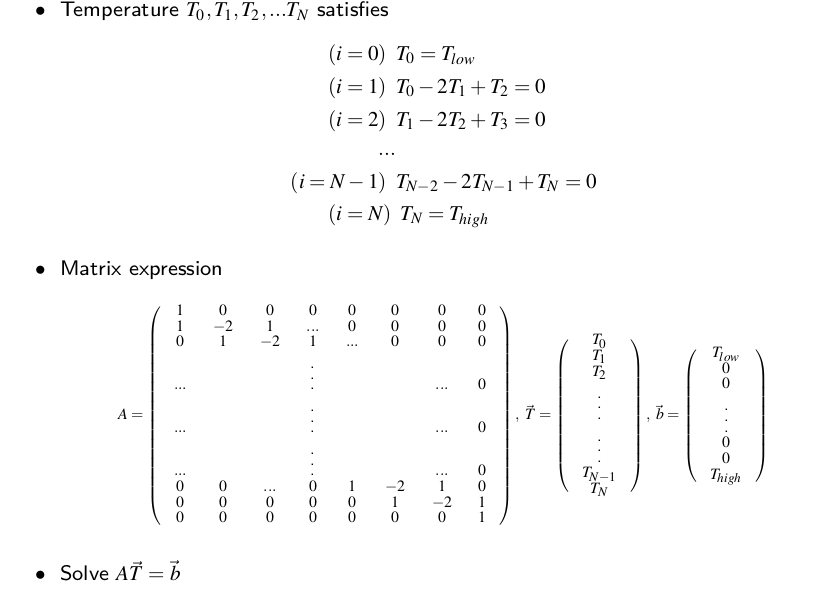
